# Stacked Manhattan and regional plot

## Load gwaslab and sumstats

Note: For v3.5.3

In [1]:
import sys
sys.path.insert(0, "/home/yunye/work/gwaslab/src")
import gwaslab as gl

In [2]:
gl1 = gl.Sumstats("../0_sample_data/bbj_bmi_female.txt.gz",snpid="SNP",chrom="CHR",ea="ALT",nea="REF",pos="POS",p="P", build="19",sep="\t", verbose=False)
gl2 = gl.Sumstats("../0_sample_data/bbj_bmi_male.txt.gz",snpid="SNP",chrom="CHR",ea="ALT",nea="REF",pos="POS",p="P", build="19",sep="\t", verbose=False)

gl1.basic_check(verbose=False)
gl2.basic_check(verbose=False)

gl.dump_pickle(gl1,"gl1.pickle",overwrite=True)
gl.dump_pickle(gl2,"gl2.pickle",overwrite=True)

## Stacked Manhattan plot

2024/12/17 12:07:50  #WARNING! Genomic coordinates version is unknown.
2024/12/17 12:07:53  #WARNING! Genomic coordinates version is unknown.


(<Figure size 2000x1600 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f3d9ec14fd0>)

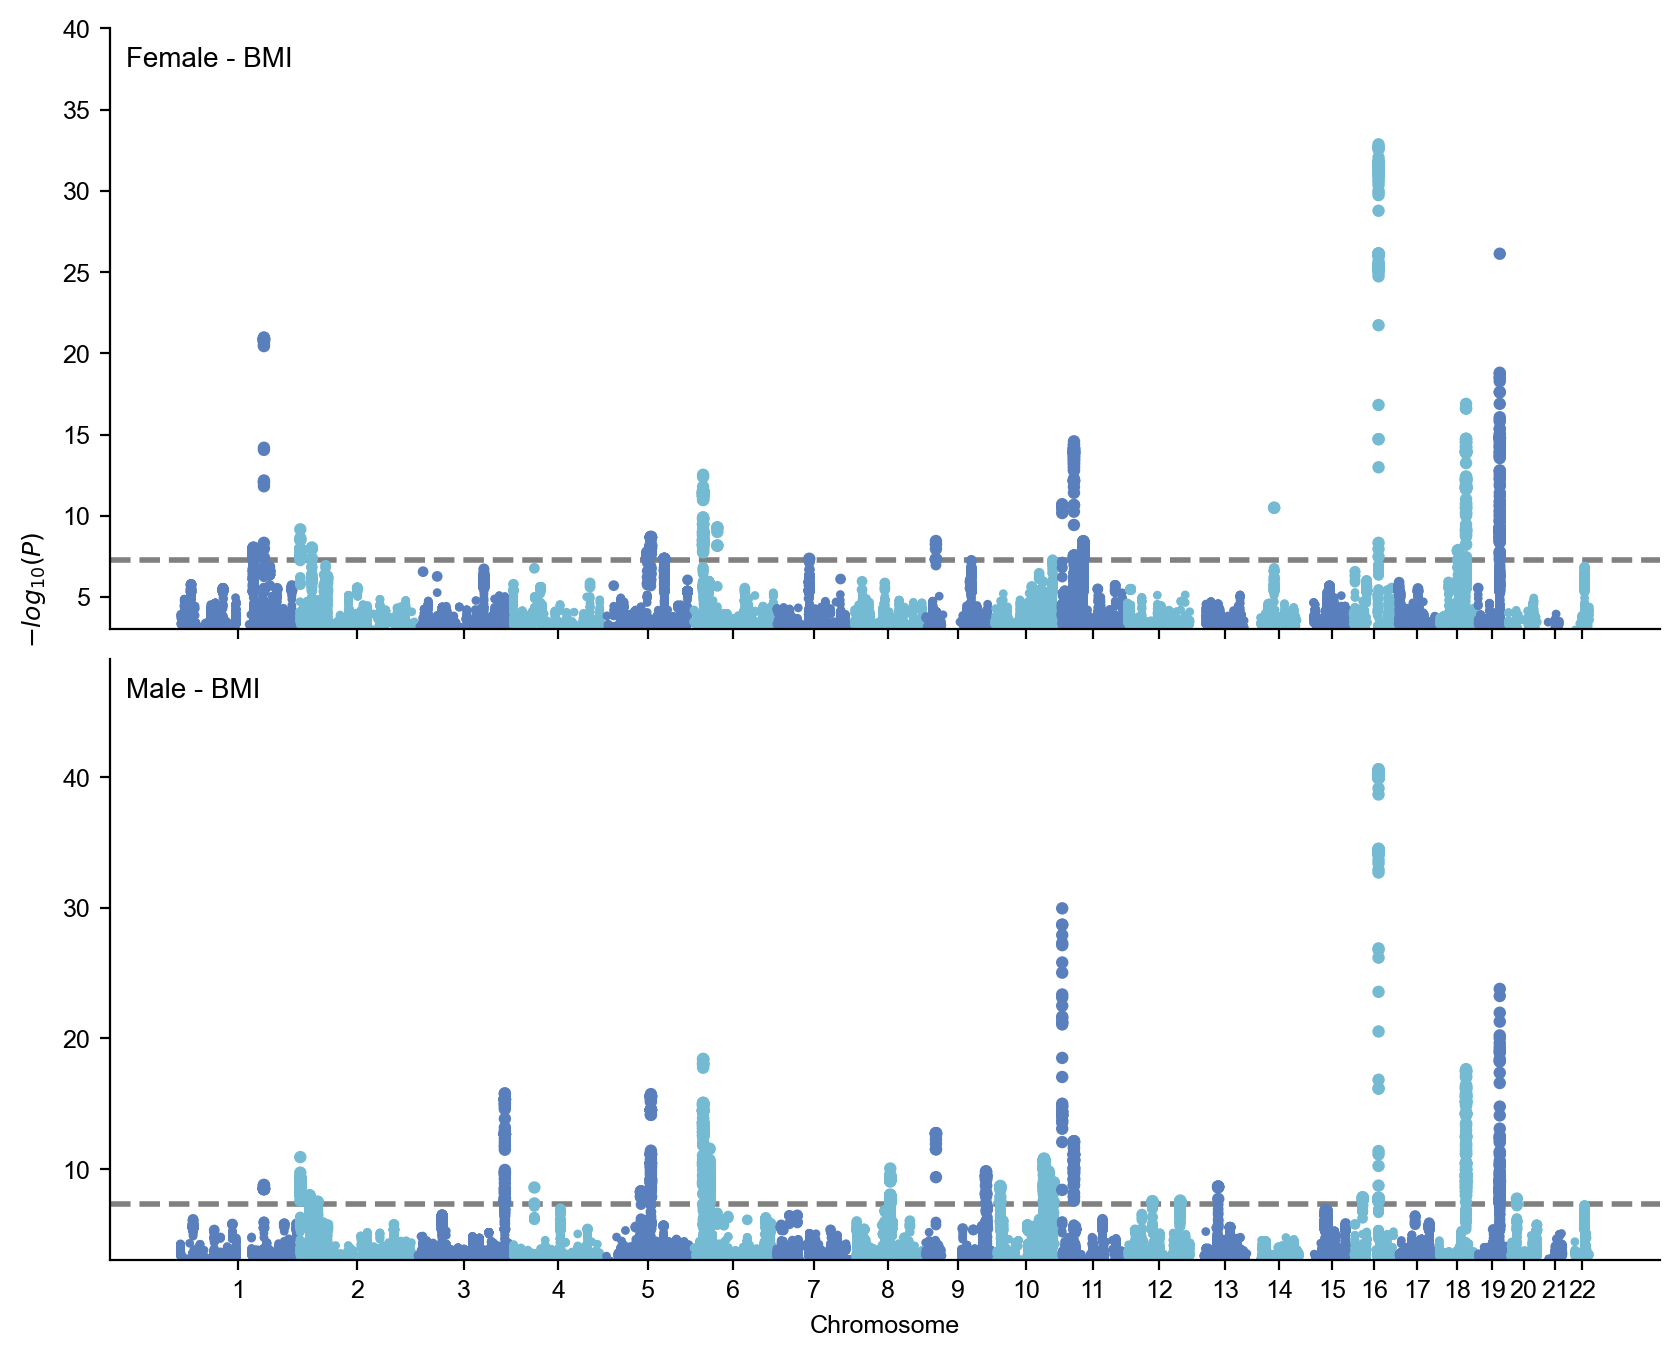

In [7]:
gl.plot_stacked_mqq(objects=[gl1,gl2],
                    mode="m",
                    skip=3,
                    titles=["Female - BMI","Male - BMI"],
                    check=False,
                    verbose=False)

## Multiple stacked plots

In [8]:
#gl.download_ref("1kg_eas_hg19")

2024/12/17 12:07:57  #WARNING! Genomic coordinates version is unknown.
2024/12/17 12:08:00  #WARNING! Genomic coordinates version is unknown.
2024/12/17 12:08:03  #WARNING! Genomic coordinates version is unknown.
2024/12/17 12:08:05  #WARNING! Genomic coordinates version is unknown.


(<Figure size 2000x3200 with 4 Axes>, <gwaslab.g_Log.Log at 0x7f3d9ec14fd0>)

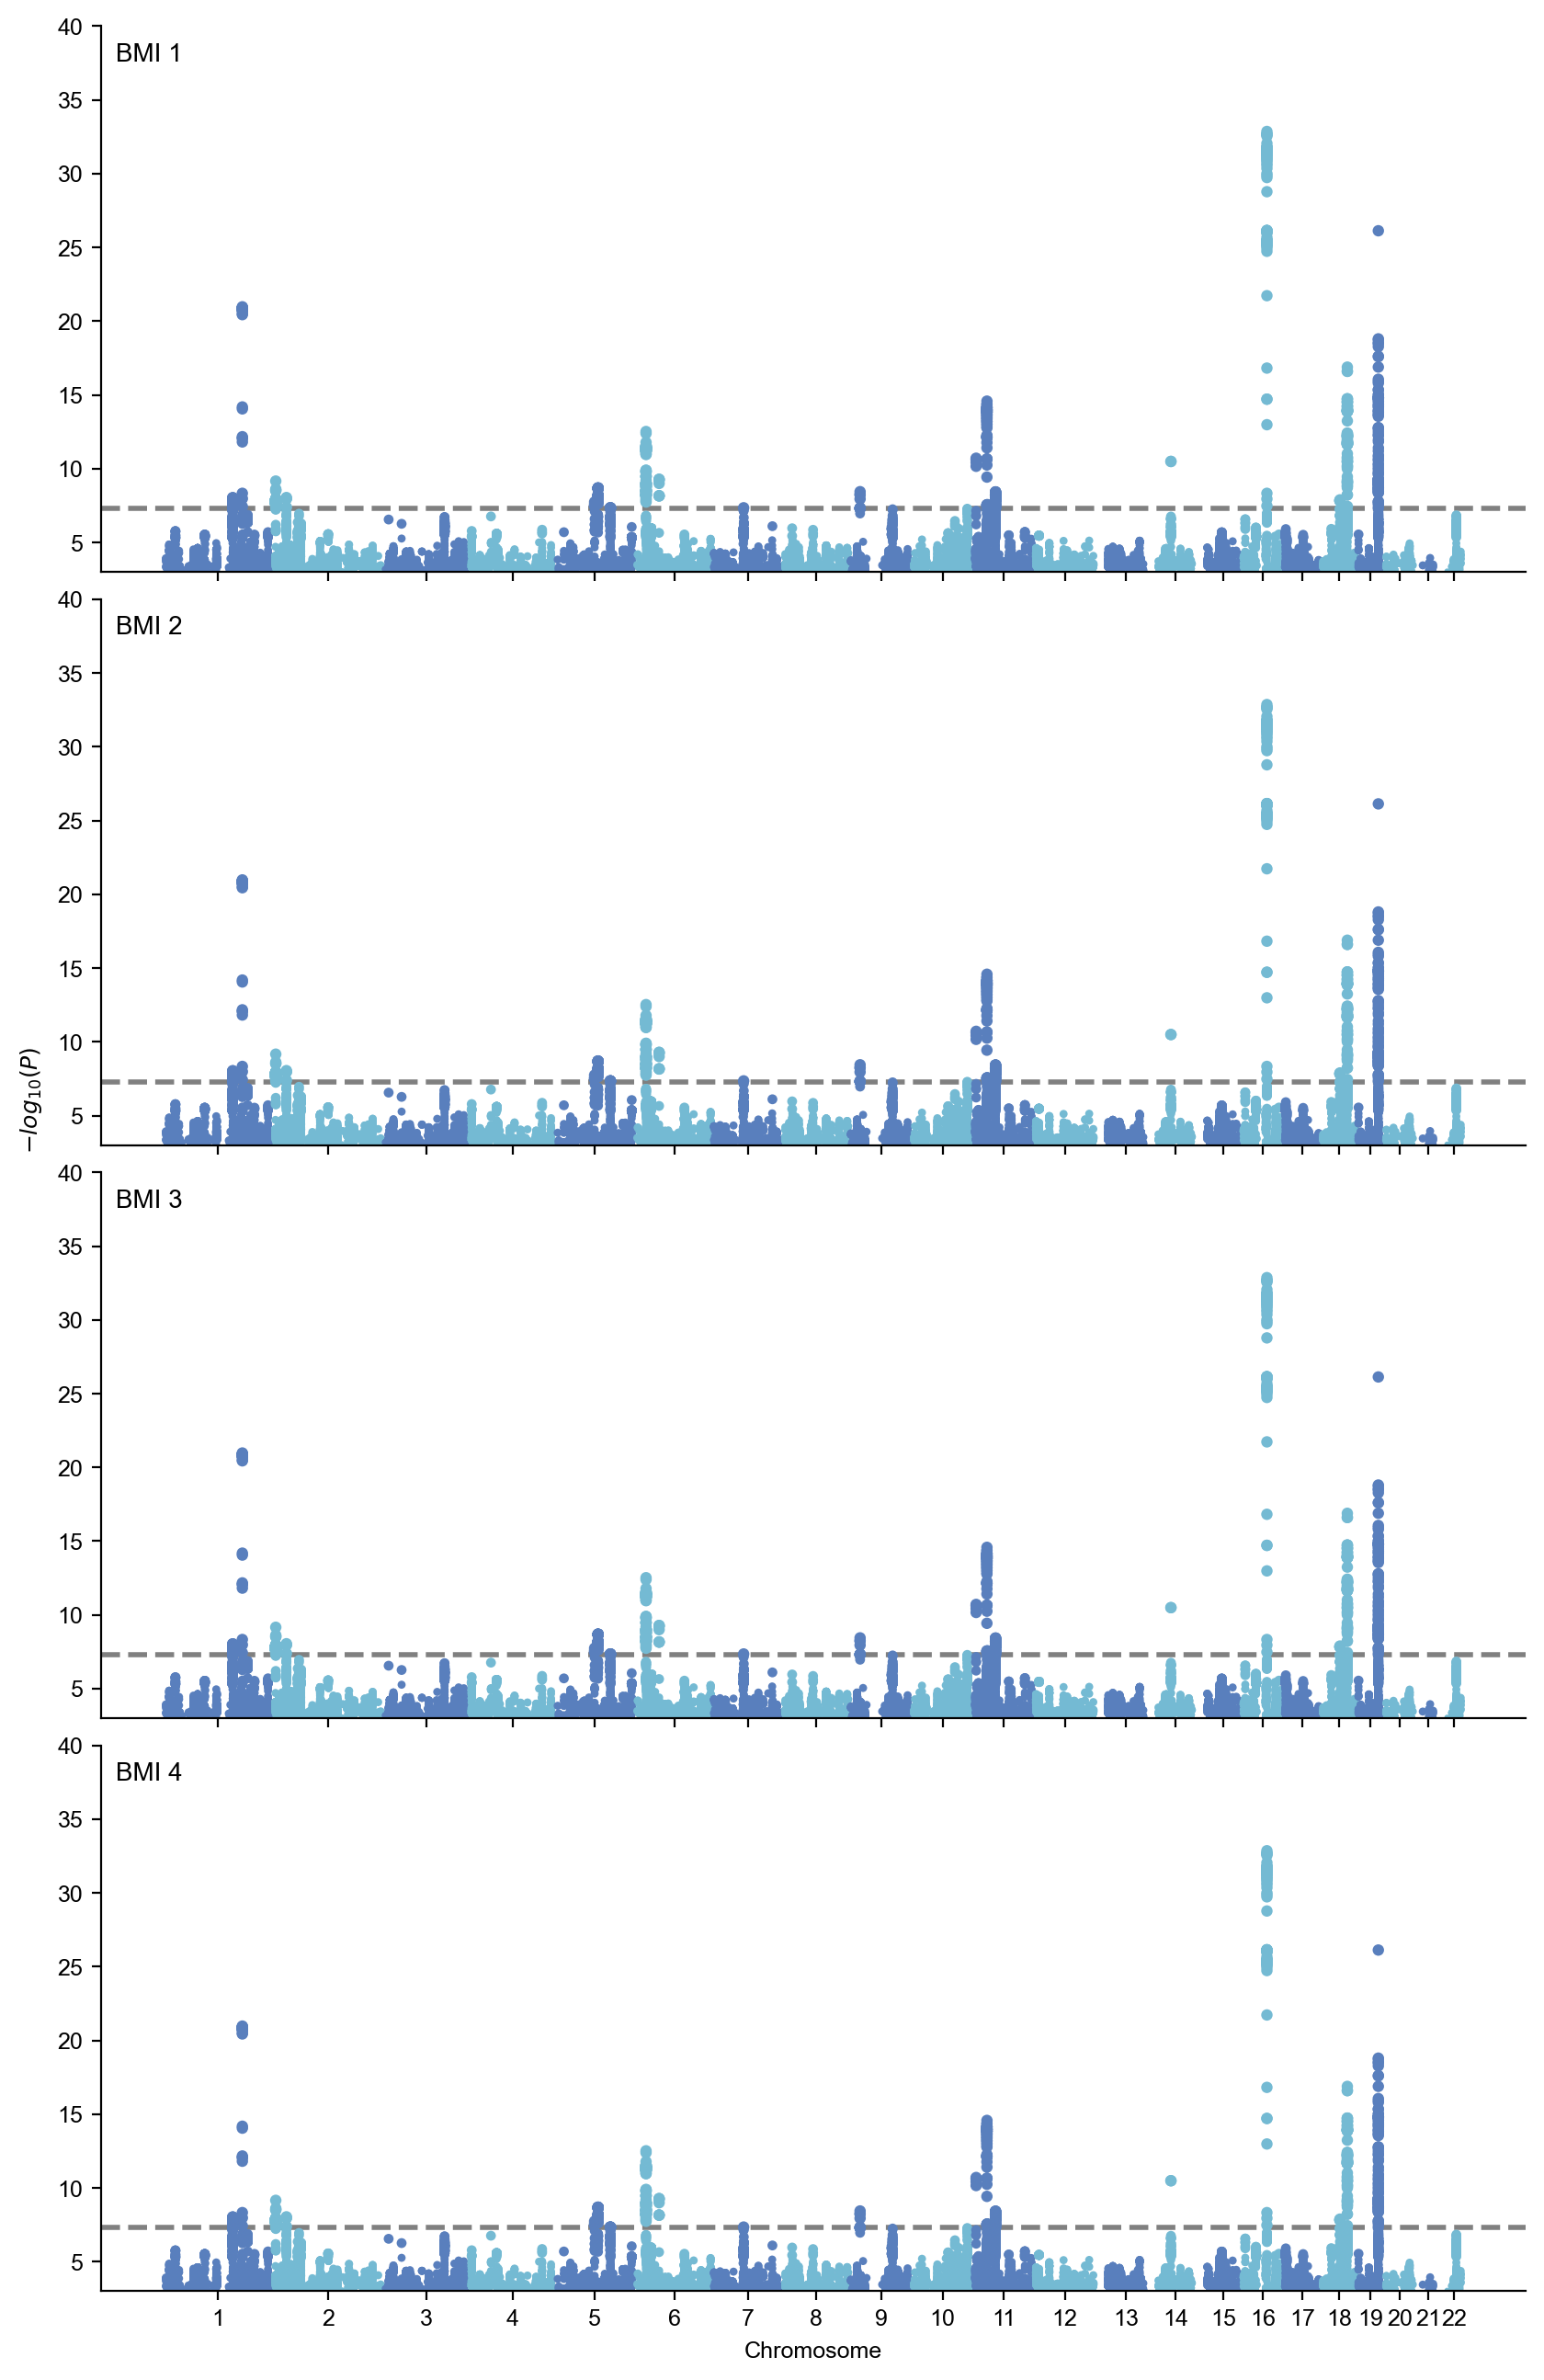

In [9]:
gl.plot_stacked_mqq(objects=[gl1,gl1,gl1,gl1],
                    mode="m",
                    skip=3,
                    titles=["BMI 1","BMI 2", "BMI 3", "BMI 4"],
                    check=False,
                    verbose=False)

## Add title and annotation

2024/12/17 12:50:28  #WARNING! Genomic coordinates version is unknown.
2024/12/17 12:50:31  #WARNING! Genomic coordinates version is unknown.


(<Figure size 2000x1600 with 2 Axes>, <gwaslab.g_Log.Log at 0x7fd953018c70>)

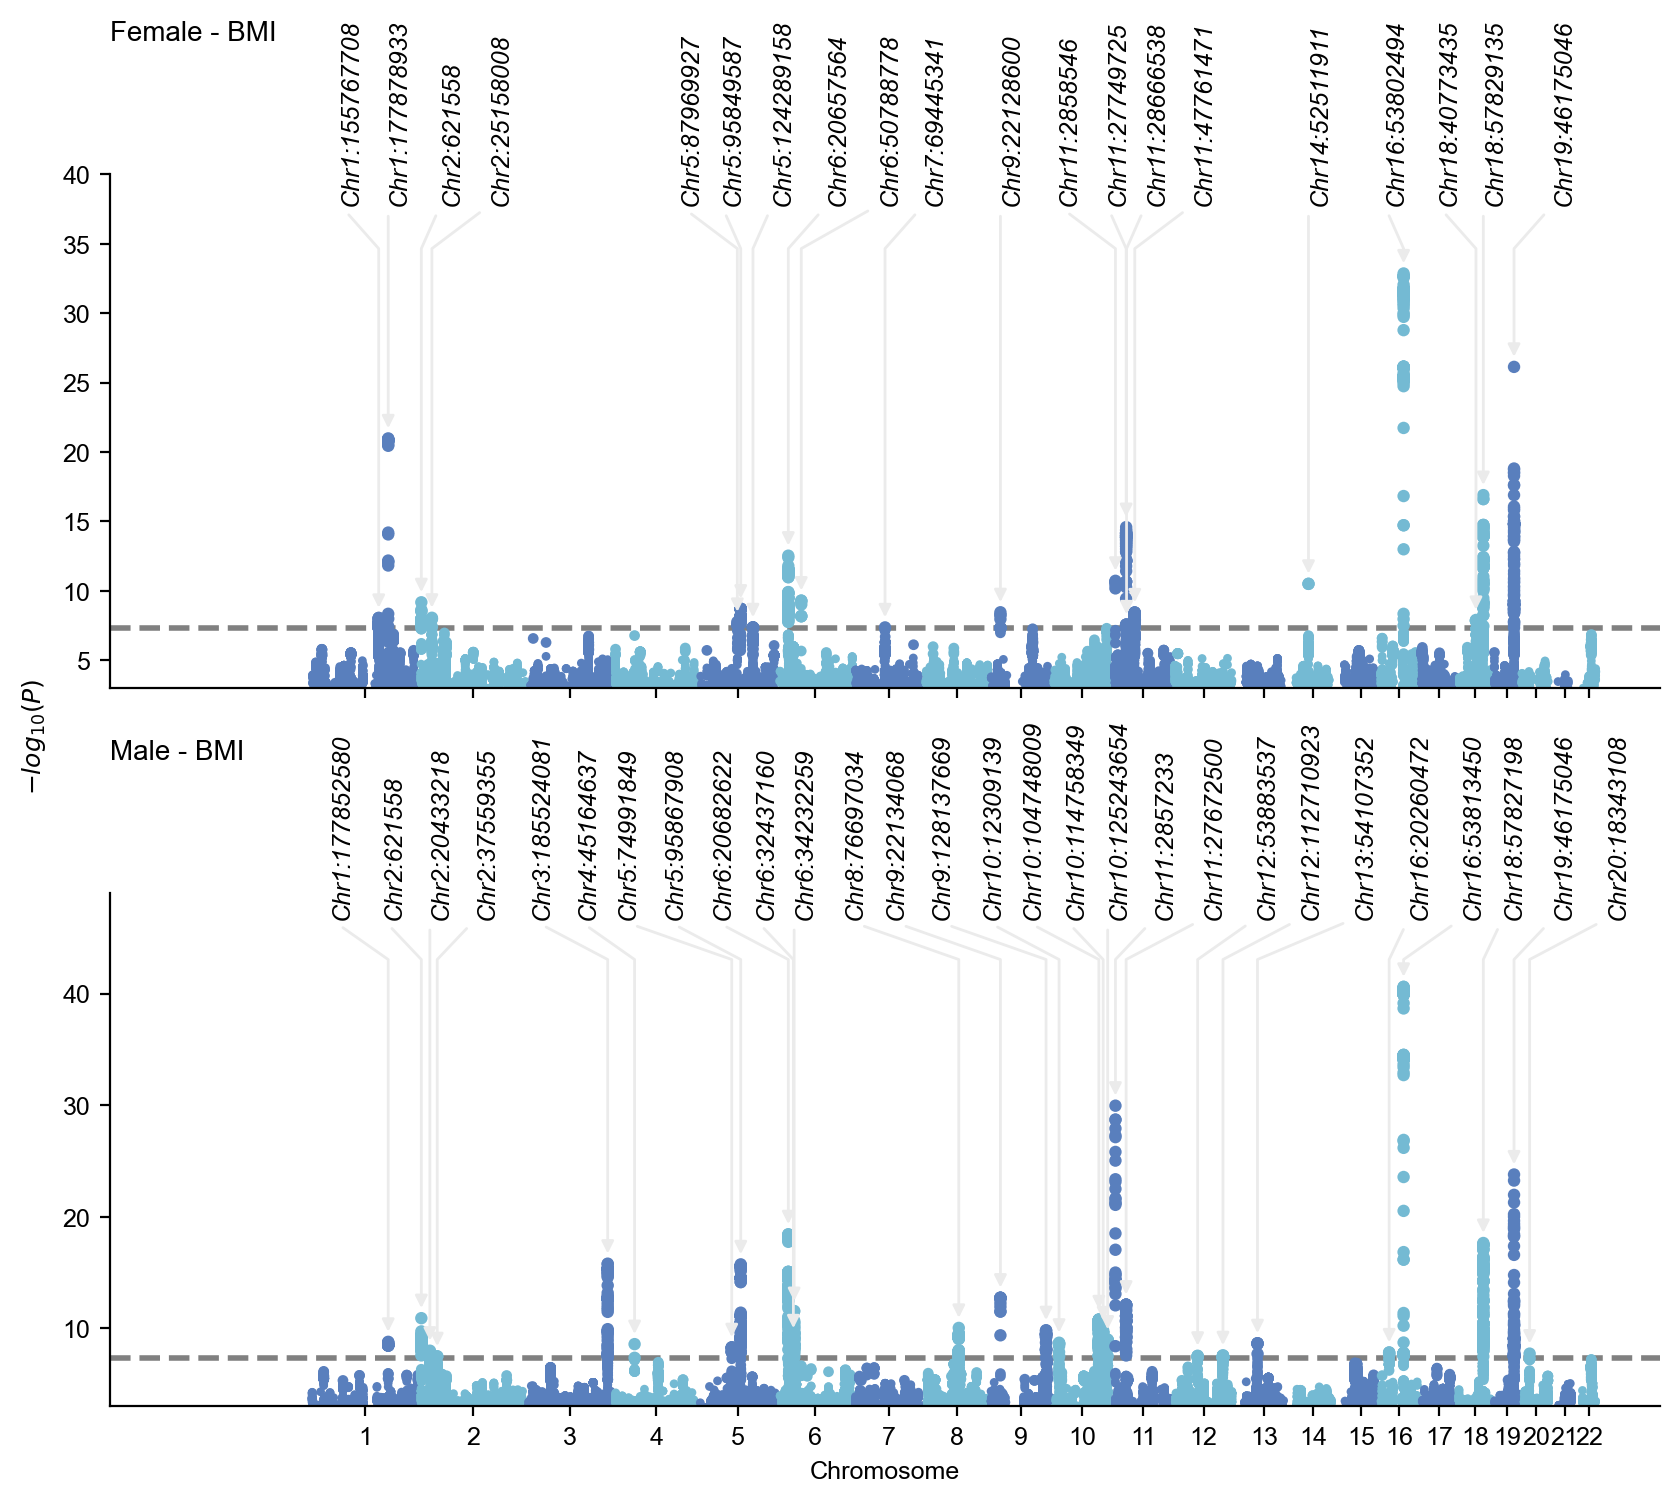

In [12]:
gl.plot_stacked_mqq(objects=[gl1,gl2],
                    mode="m",
                    skip=3,
                    anno=True,
                    anno_style="expand",
                    titles=["Female - BMI","Male - BMI"],
                    region_hspace=0.4,   # increase the space between each subplot
                    xpadl=0.05,          # increase left padding for X axis
                    title_pos=[0, 1.3],  # adjust title position
                    check=False,
                    verbose=False)

## Customization

You can customize each plot using options for plot_mqq() by adding a number to the end of the option like `highlight1` means `highlight` option for the first panel. if no number suffix was added, the option will be applied to all panels. 


2024/12/17 12:51:33  #WARNING! Genomic coordinates version is unknown.
2024/12/17 12:51:37  #WARNING! Genomic coordinates version is unknown.


(<Figure size 2000x1600 with 2 Axes>, <gwaslab.g_Log.Log at 0x7fd953018c70>)

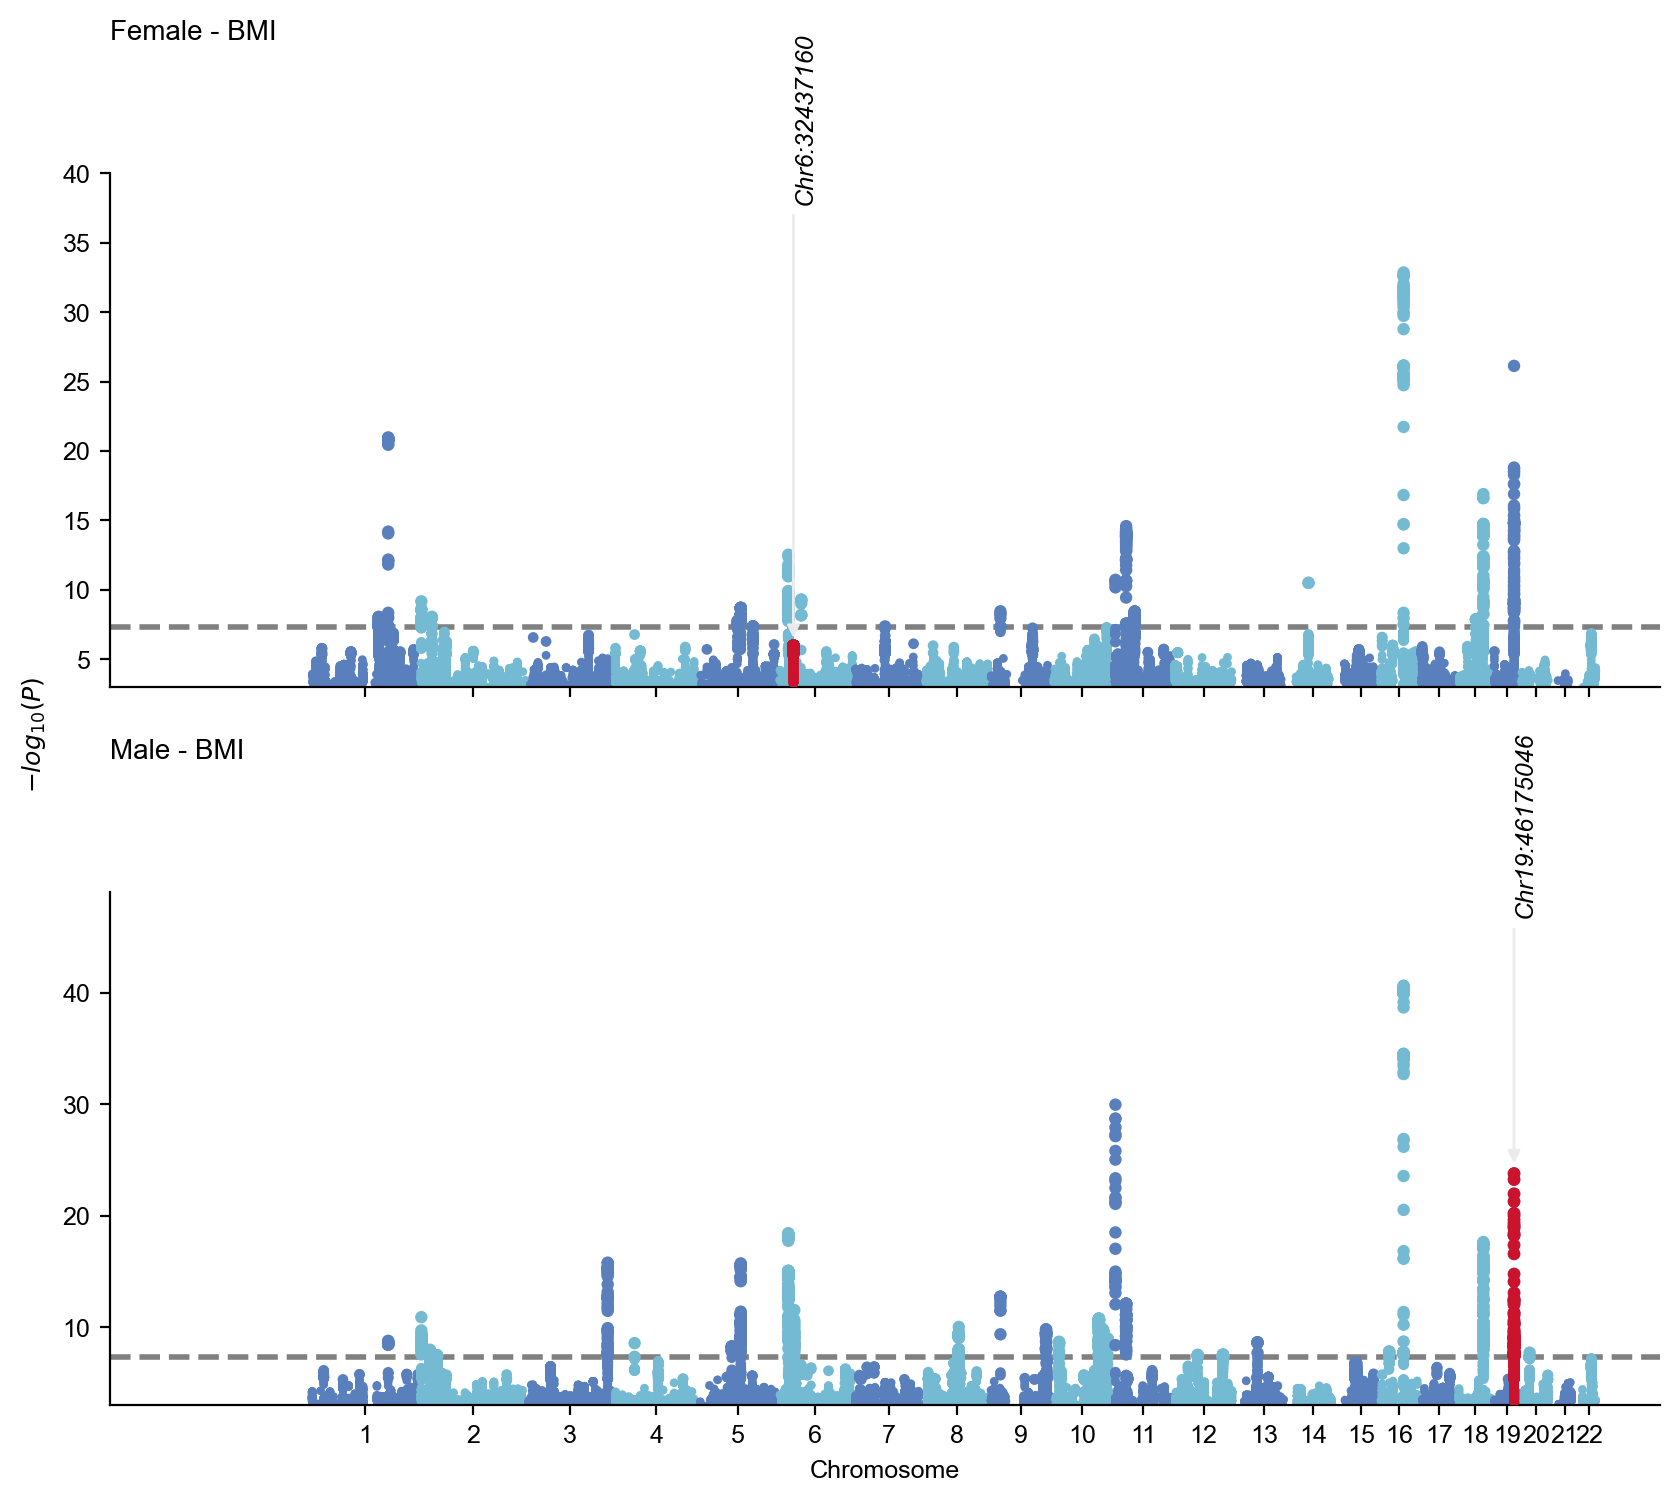

In [13]:
gl.plot_stacked_mqq(objects=[gl1,gl2],
                    mode="m",
                    skip=3,
                    anno=True,
                    anno_style="expand",
                    titles=["Female - BMI","Male - BMI"],
                    highlight1=["rs183975233"],
                    highlight2=["rs35560038"],
                    anno_set1=["rs183975233"],
                    anno_set2=["rs35560038"],
                    region_hspace=0.4,   # increase the space between each subplot
                    xpadl=0.05,          # increase left padding for X axis
                    title_pos=[0, 1.3],  # adjust title position
                    check=False,
                    verbose=False)

## Stacked regional plot

In [14]:
gl2.filter_flanking_by_chrpos((19,46214297)).filter_value("P <1e-20").data

2024/12/17 12:53:37 Start to extract variants in the flanking regions using CHR and POS...
2024/12/17 12:53:37  - Central positions: (19, 46214297)
2024/12/17 12:53:37  - Flanking windowsize in kb: 500
2024/12/17 12:53:37  - Variants in flanking region 19:45714297-46714297 : 2137
2024/12/17 12:53:37  - Extracted 2137 variants in the regions.
2024/12/17 12:53:37 Finished extracting variants in the flanking regions.
2024/12/17 12:53:37 Start filtering values by condition: P <1e-20
2024/12/17 12:53:37  -Removing 2131 variants not meeting the conditions: P <1e-20
2024/12/17 12:53:37 Finished filtering values.


SNPID  CHR       POS EA NEA             P   STATUS
5648737  rs35560038   19  46175046  T   A  1.643000e-24  1980099
5648740  rs34089191   19  46176723  C   G  5.961000e-21  1980099
5648741  rs55669001   19  46177235  C   T  9.950000e-21  1980099
5648808   rs9676912   19  46212182  T   C  5.247000e-22  1980099
5648811   rs8101428   19  46212952  C   T  1.094000e-22  1980099
5648816   rs1055220   19  46214297  T   C  5.731000e-24  1980099

## stacked regional plots with single reference SNP

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


(<Figure size 3200x2400 with 6 Axes>, <gwaslab.g_Log.Log at 0x7fd953018c70>)

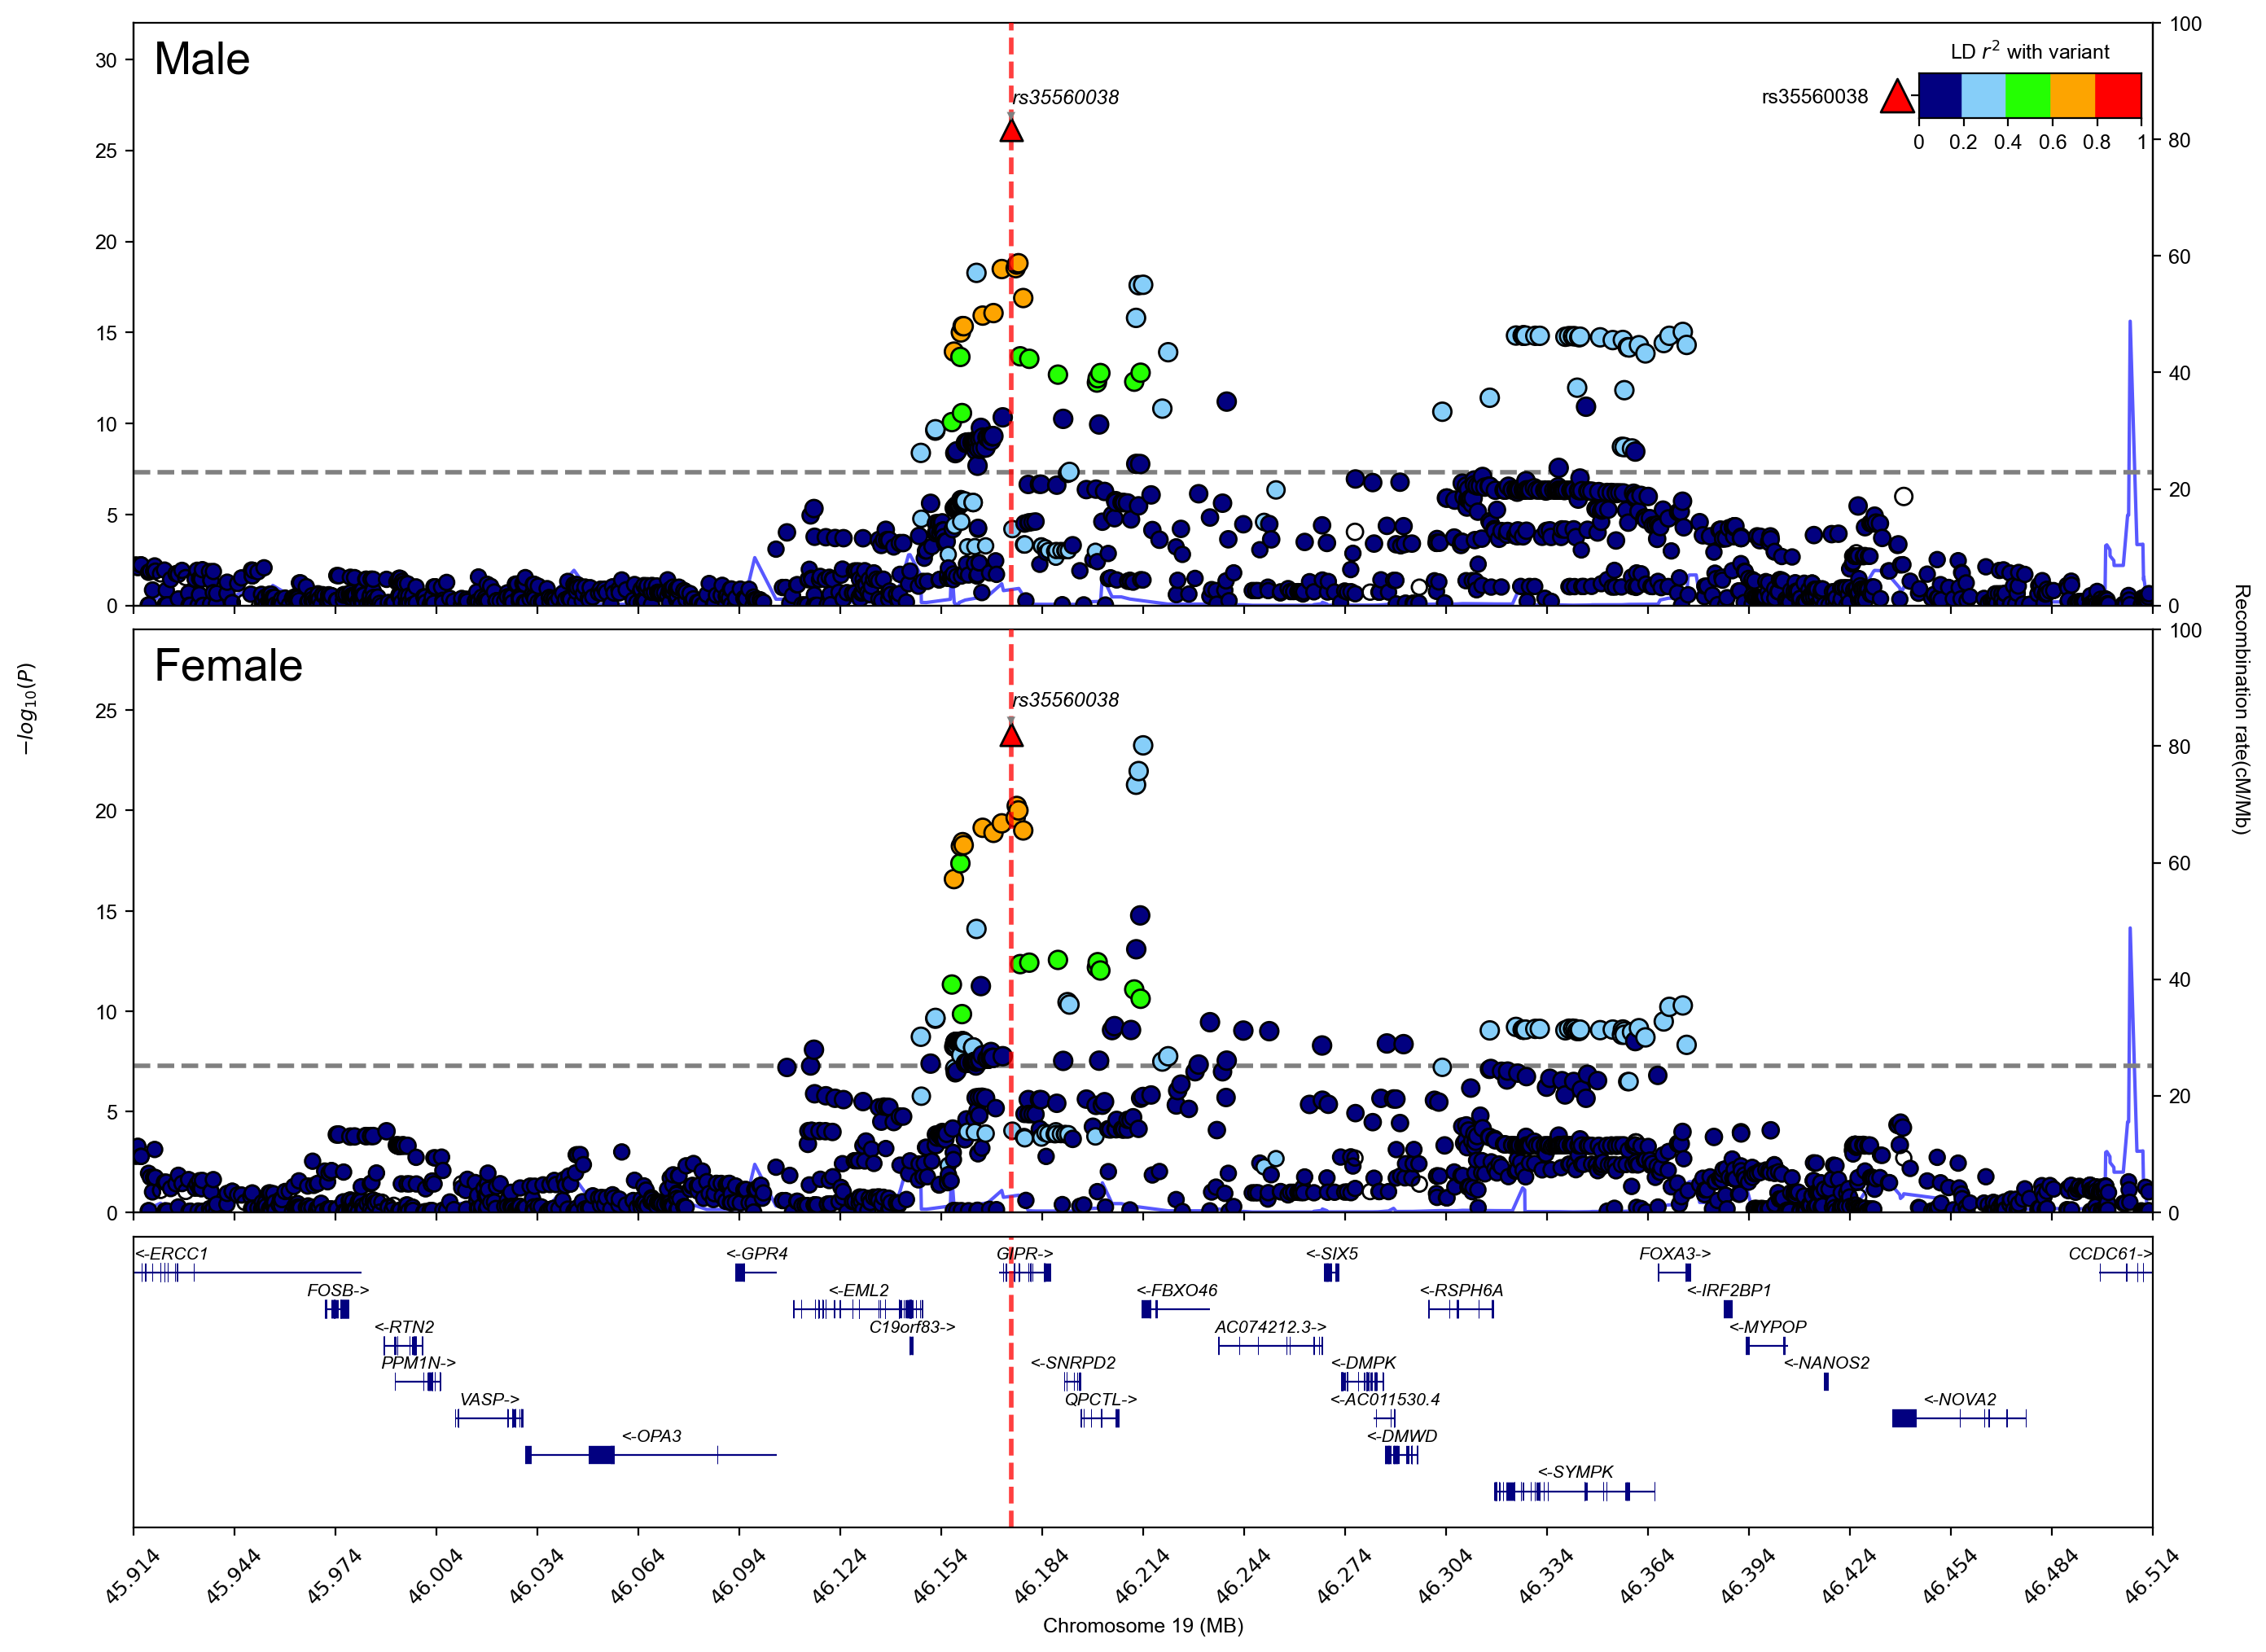

In [19]:
gl.plot_stacked_mqq(objects=[gl1,gl2],
                    vcfs=[gl.get_path("1kg_eas_hg19"), gl.get_path("1kg_eas_hg19")],
                    region=(19,46214297 - 300000, 46214297 + 300000),
                    build="19",
                    mode="r",
                    anno="SNPID",
                    anno_style="tight",
                    titles=["Male","Female"],
                    title_args={"size":20},
                    anno_args={"rotation":0}, verbose=False, check=False)

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


(<Figure size 3200x2400 with 6 Axes>, <gwaslab.g_Log.Log at 0x7fd953018c70>)

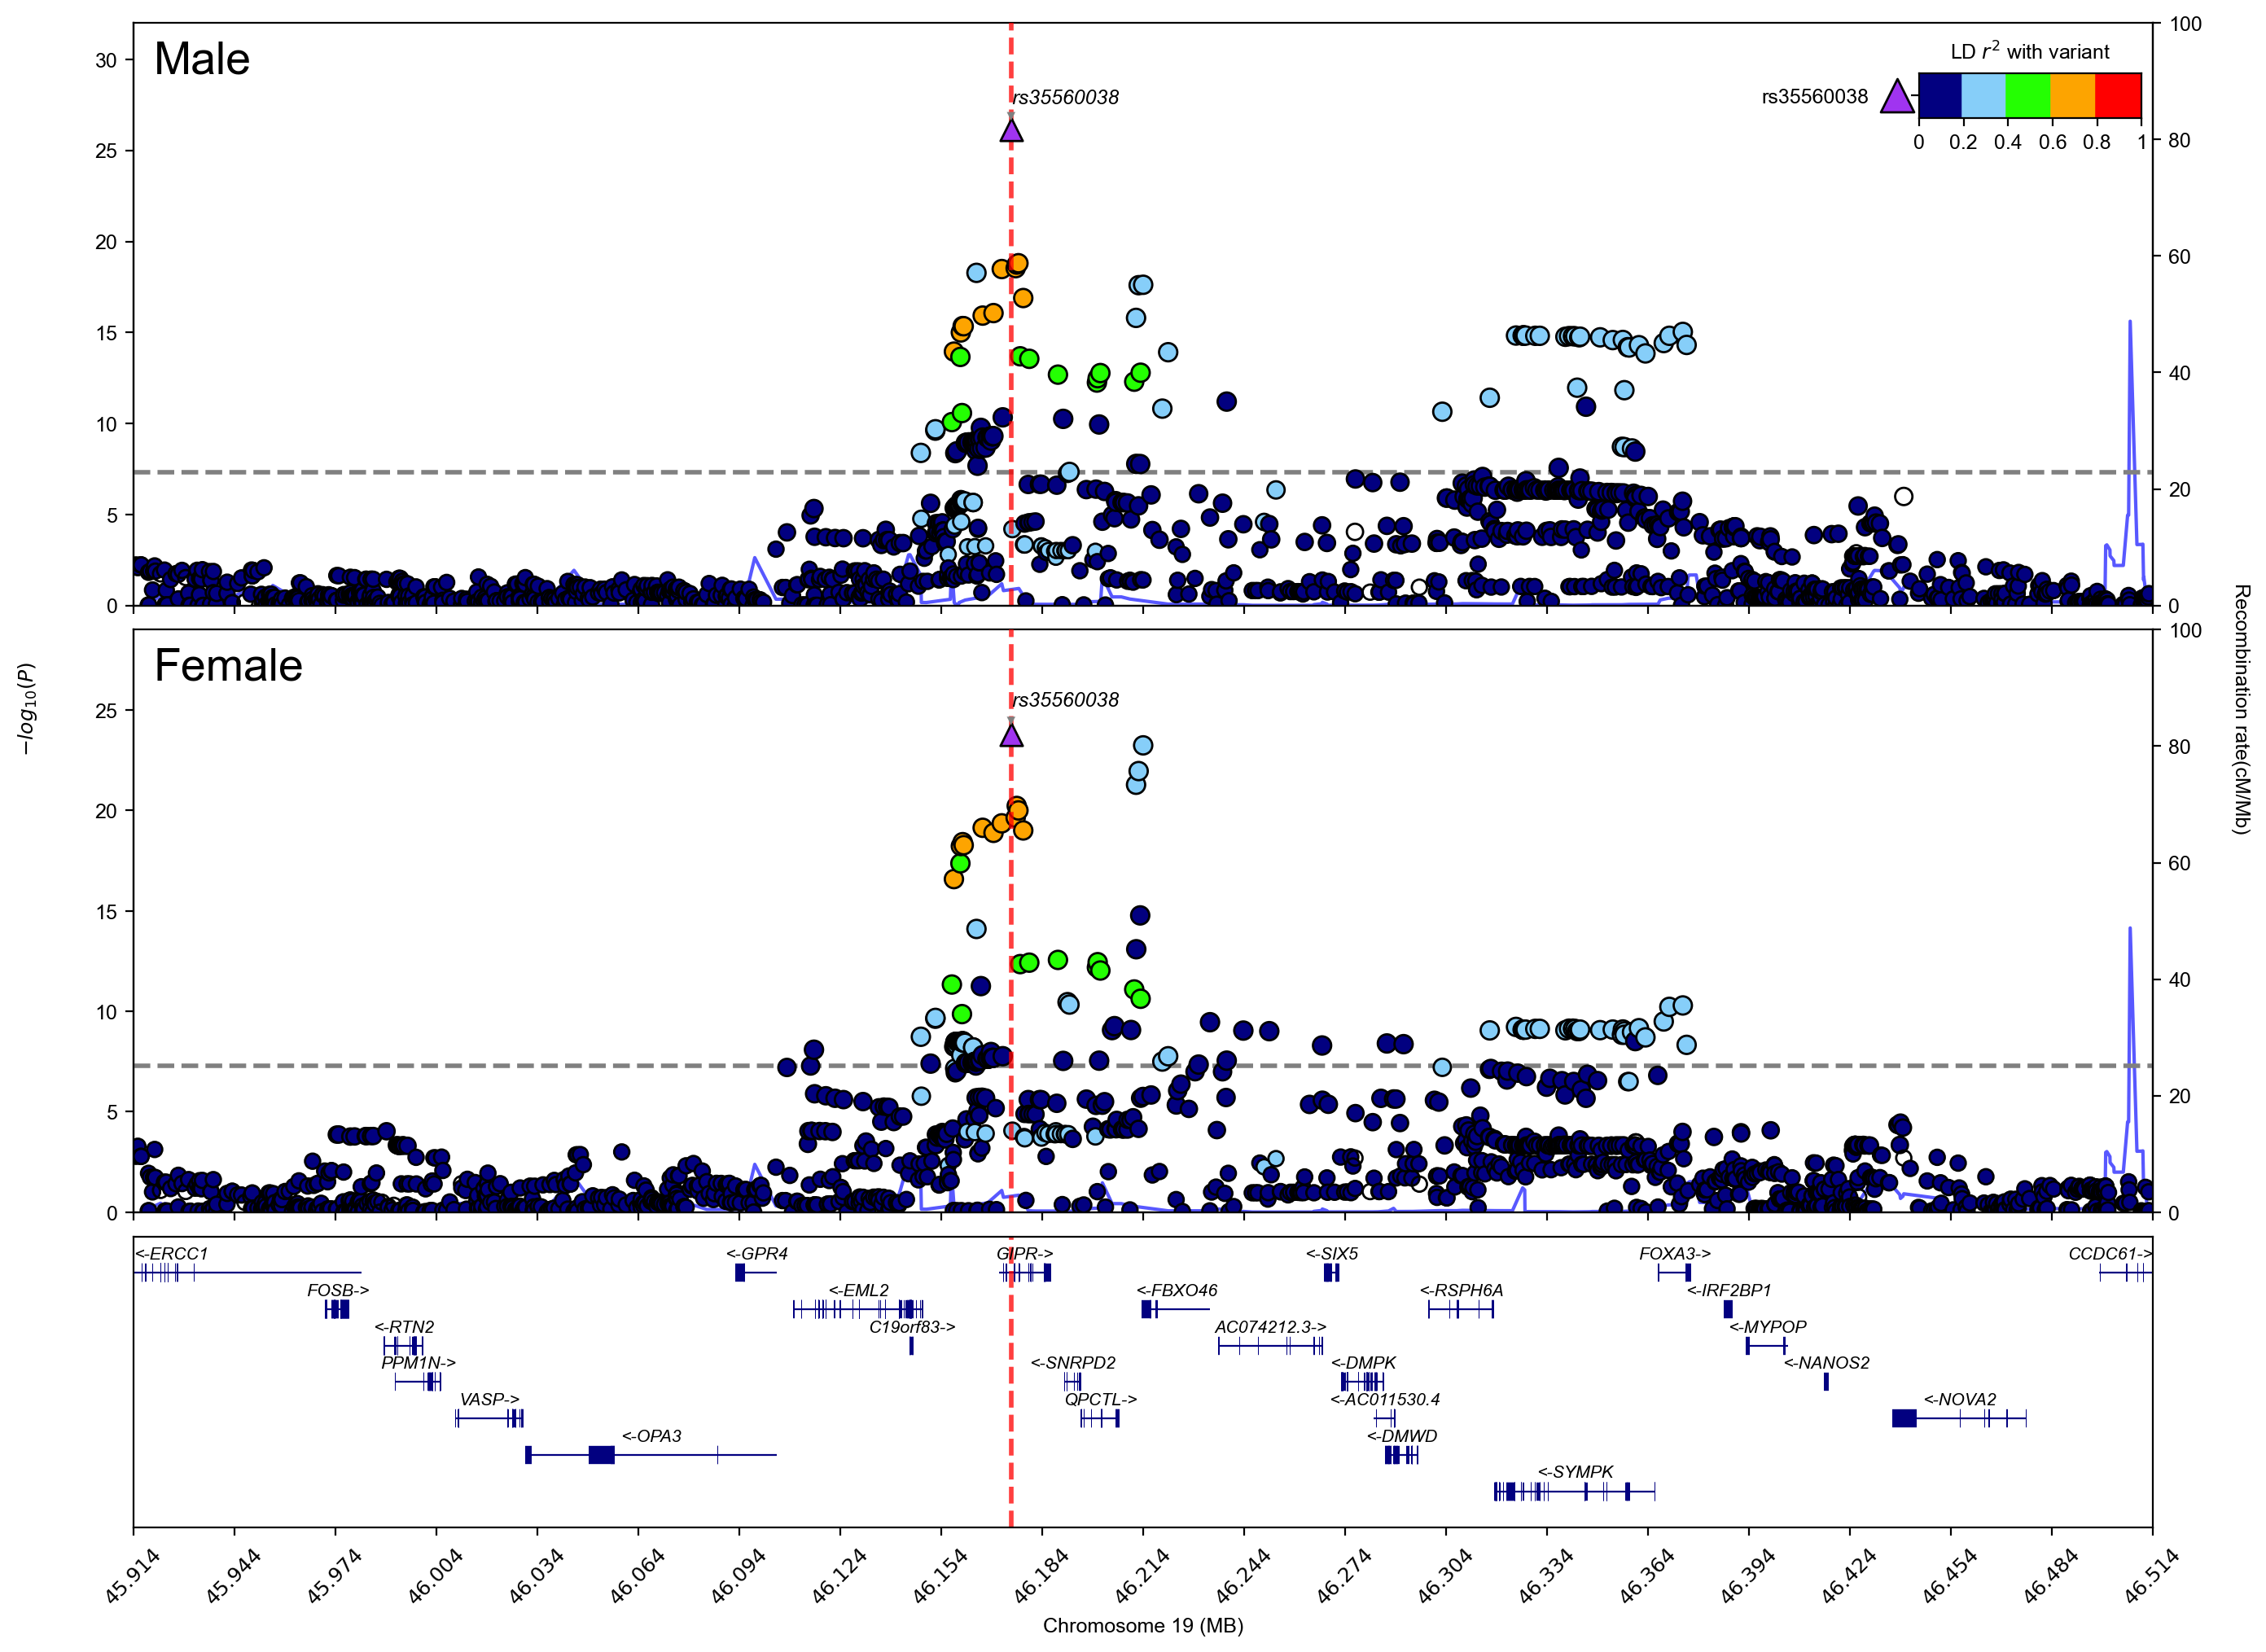

In [18]:
gl.plot_stacked_mqq(objects=[gl1,gl2],
                    vcfs=[gl.get_path("1kg_eas_hg19"), gl.get_path("1kg_eas_hg19")],
                    region=(19,46214297 - 300000, 46214297 + 300000),
                    build="19",
                    region_ld_colors=["#E4E4E4","#020080","#86CEF9","#24FF02","#FDA400","#FF0000","#A034F0"], 
                    mode="r",
                    anno="SNPID",
                    anno_style="tight",
                    titles=["Male","Female"],
                    title_args={"size":20},
                    anno_args={"rotation":0}, verbose=False, check=False)

## stacked regional plots with multiple reference SNPs

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


(<Figure size 3200x2400 with 6 Axes>, <gwaslab.g_Log.Log at 0x7fd953018c70>)

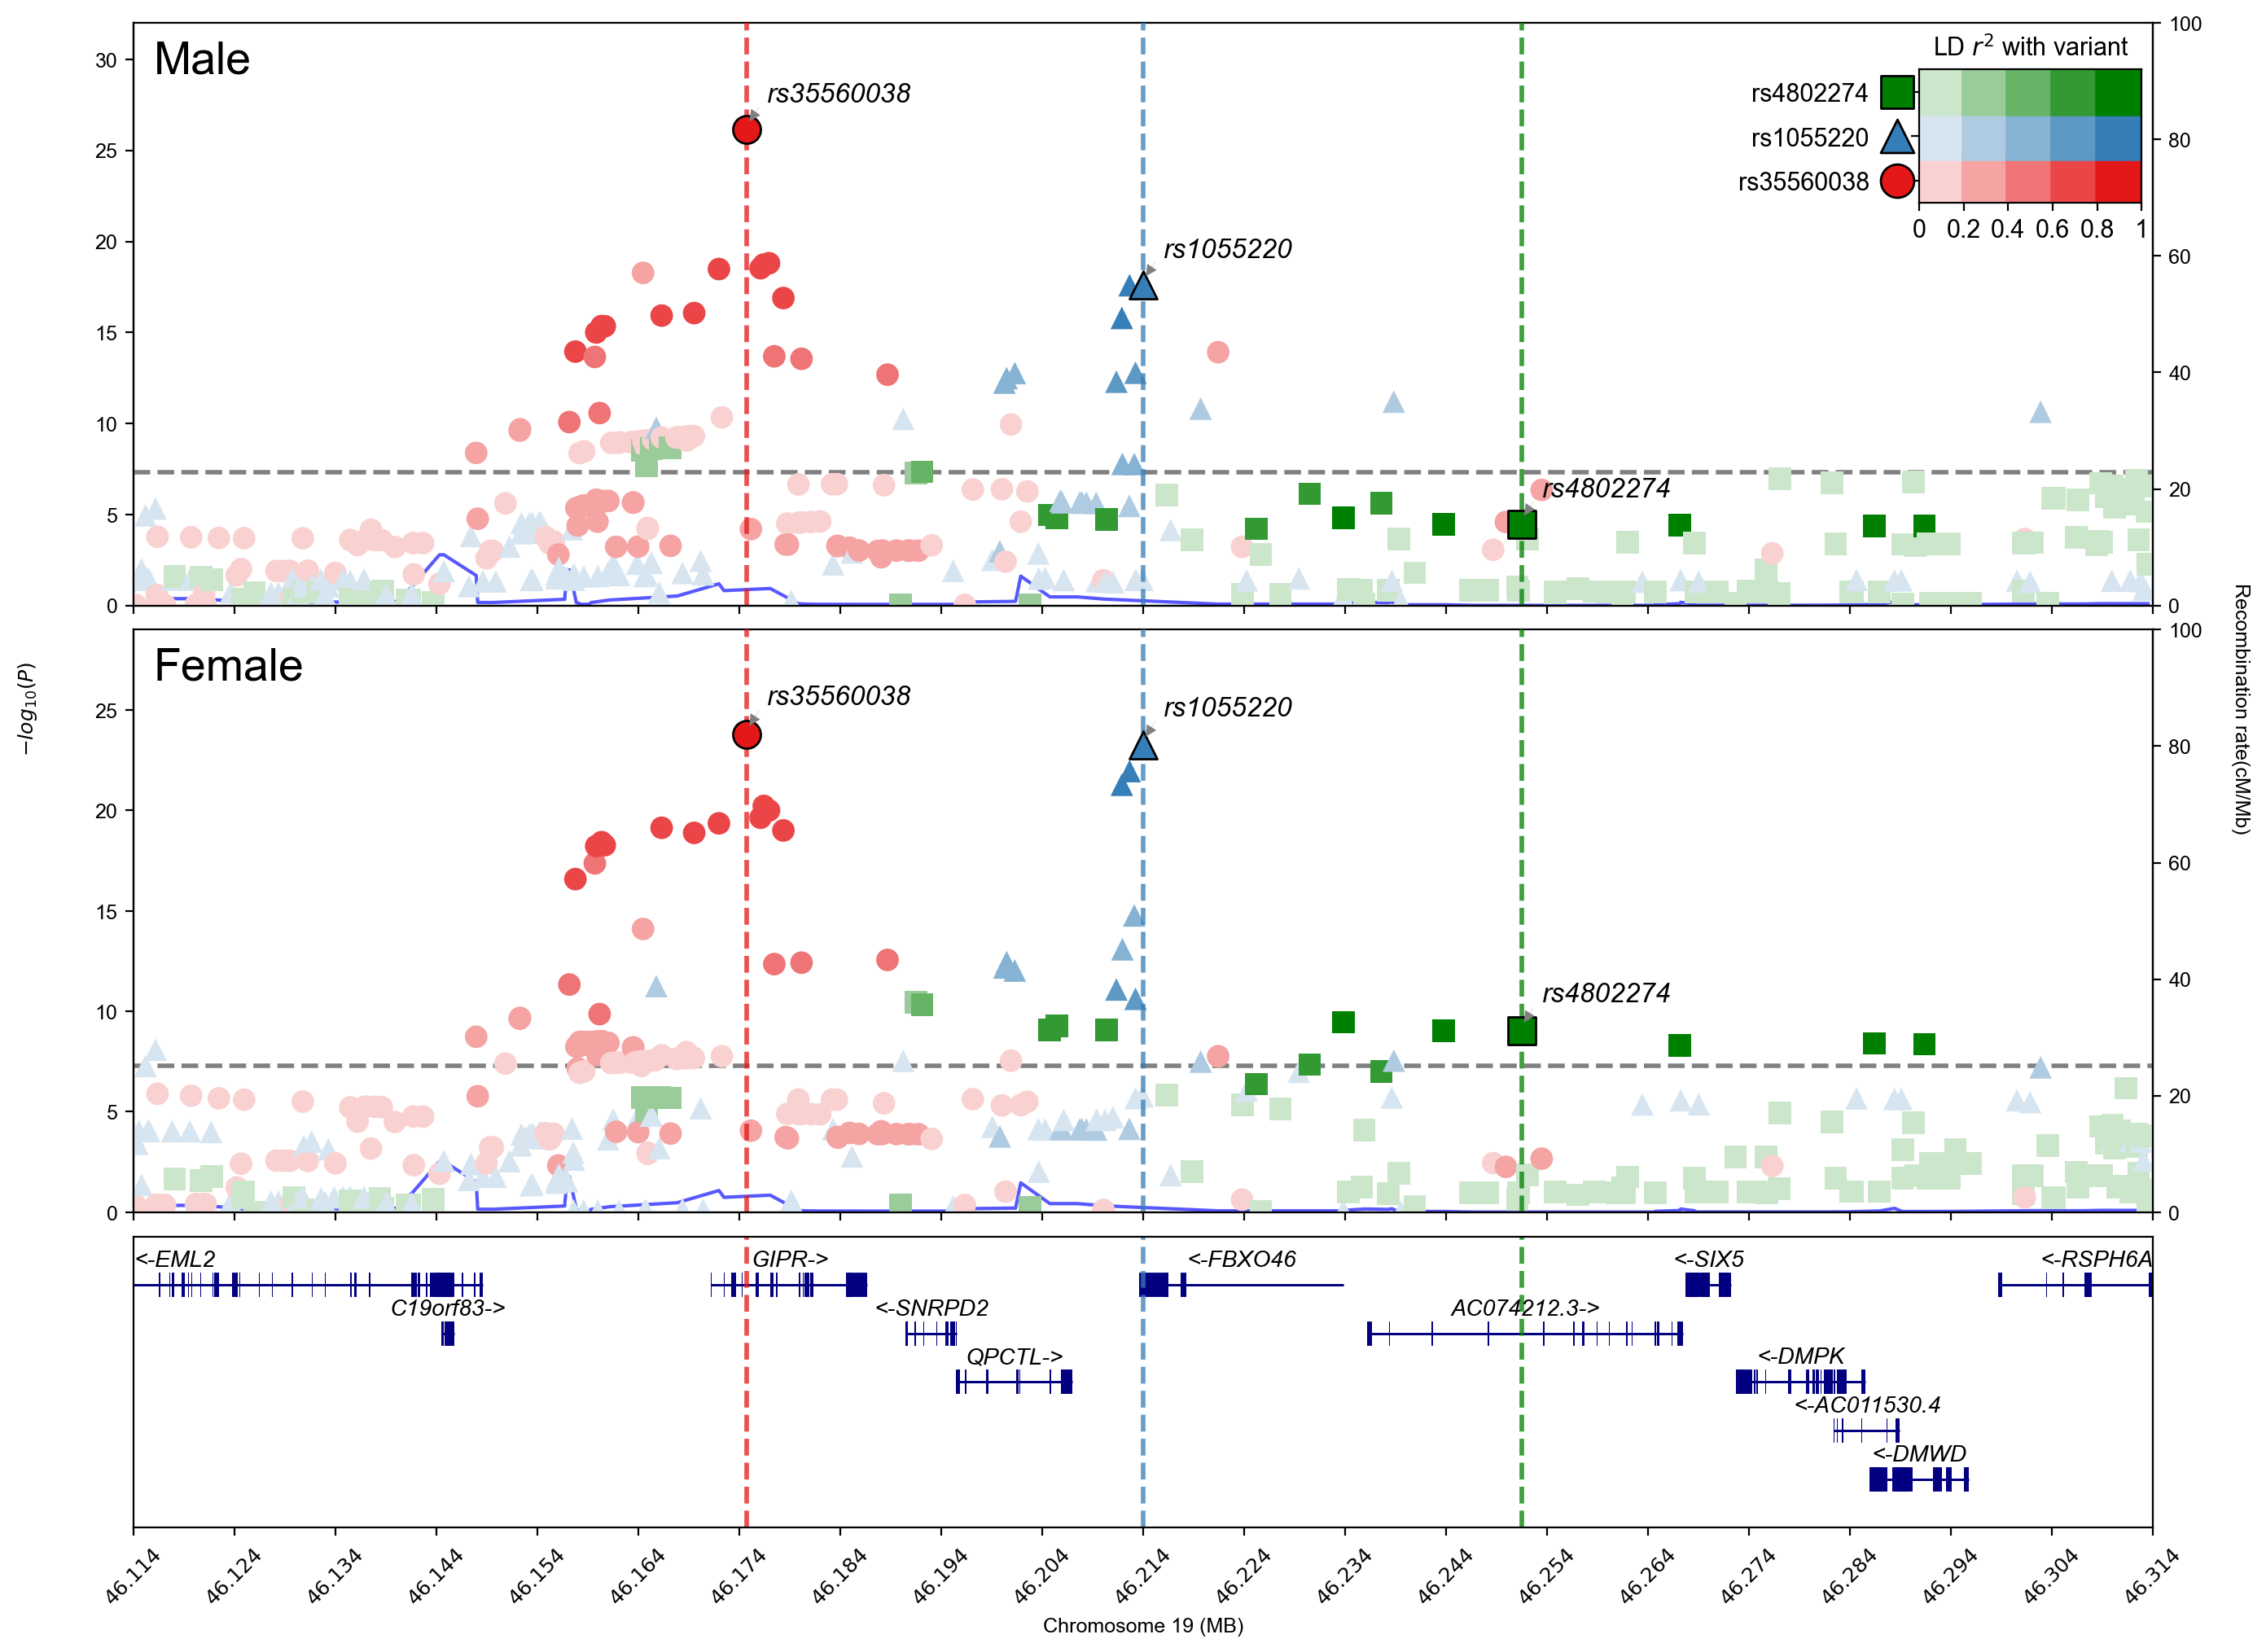

In [15]:
gl.plot_stacked_mqq(objects=[gl1,gl2],
                    vcfs=[gl.get_path("1kg_eas_hg19"), gl.get_path("1kg_eas_hg19")],
                    region=(19,46214297 - 100000, 46214297 + 100000),
                    region_ref =["rs35560038","rs1055220","rs4802274"],
                    build="19",
                    anno="SNPID",
                    anno_set =["rs35560038","rs1055220","rs4802274"],
                    mode="r",
                    anno_style="tight",anno_adjust=True,
                    cbar_fontsize=11,
                    anno_xshift=0.01,
                    marker_size=(100,100),
                    titles=["Male","Female"],
                    title_args={"size":20},
                    anno_args={"rotation":0,"fontsize":12}, verbose=False, check=False)

## Stacked regional plots with chromatin status

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


(<Figure size 3200x3200 with 7 Axes>, <gwaslab.g_Log.Log at 0x7fd953018c70>)

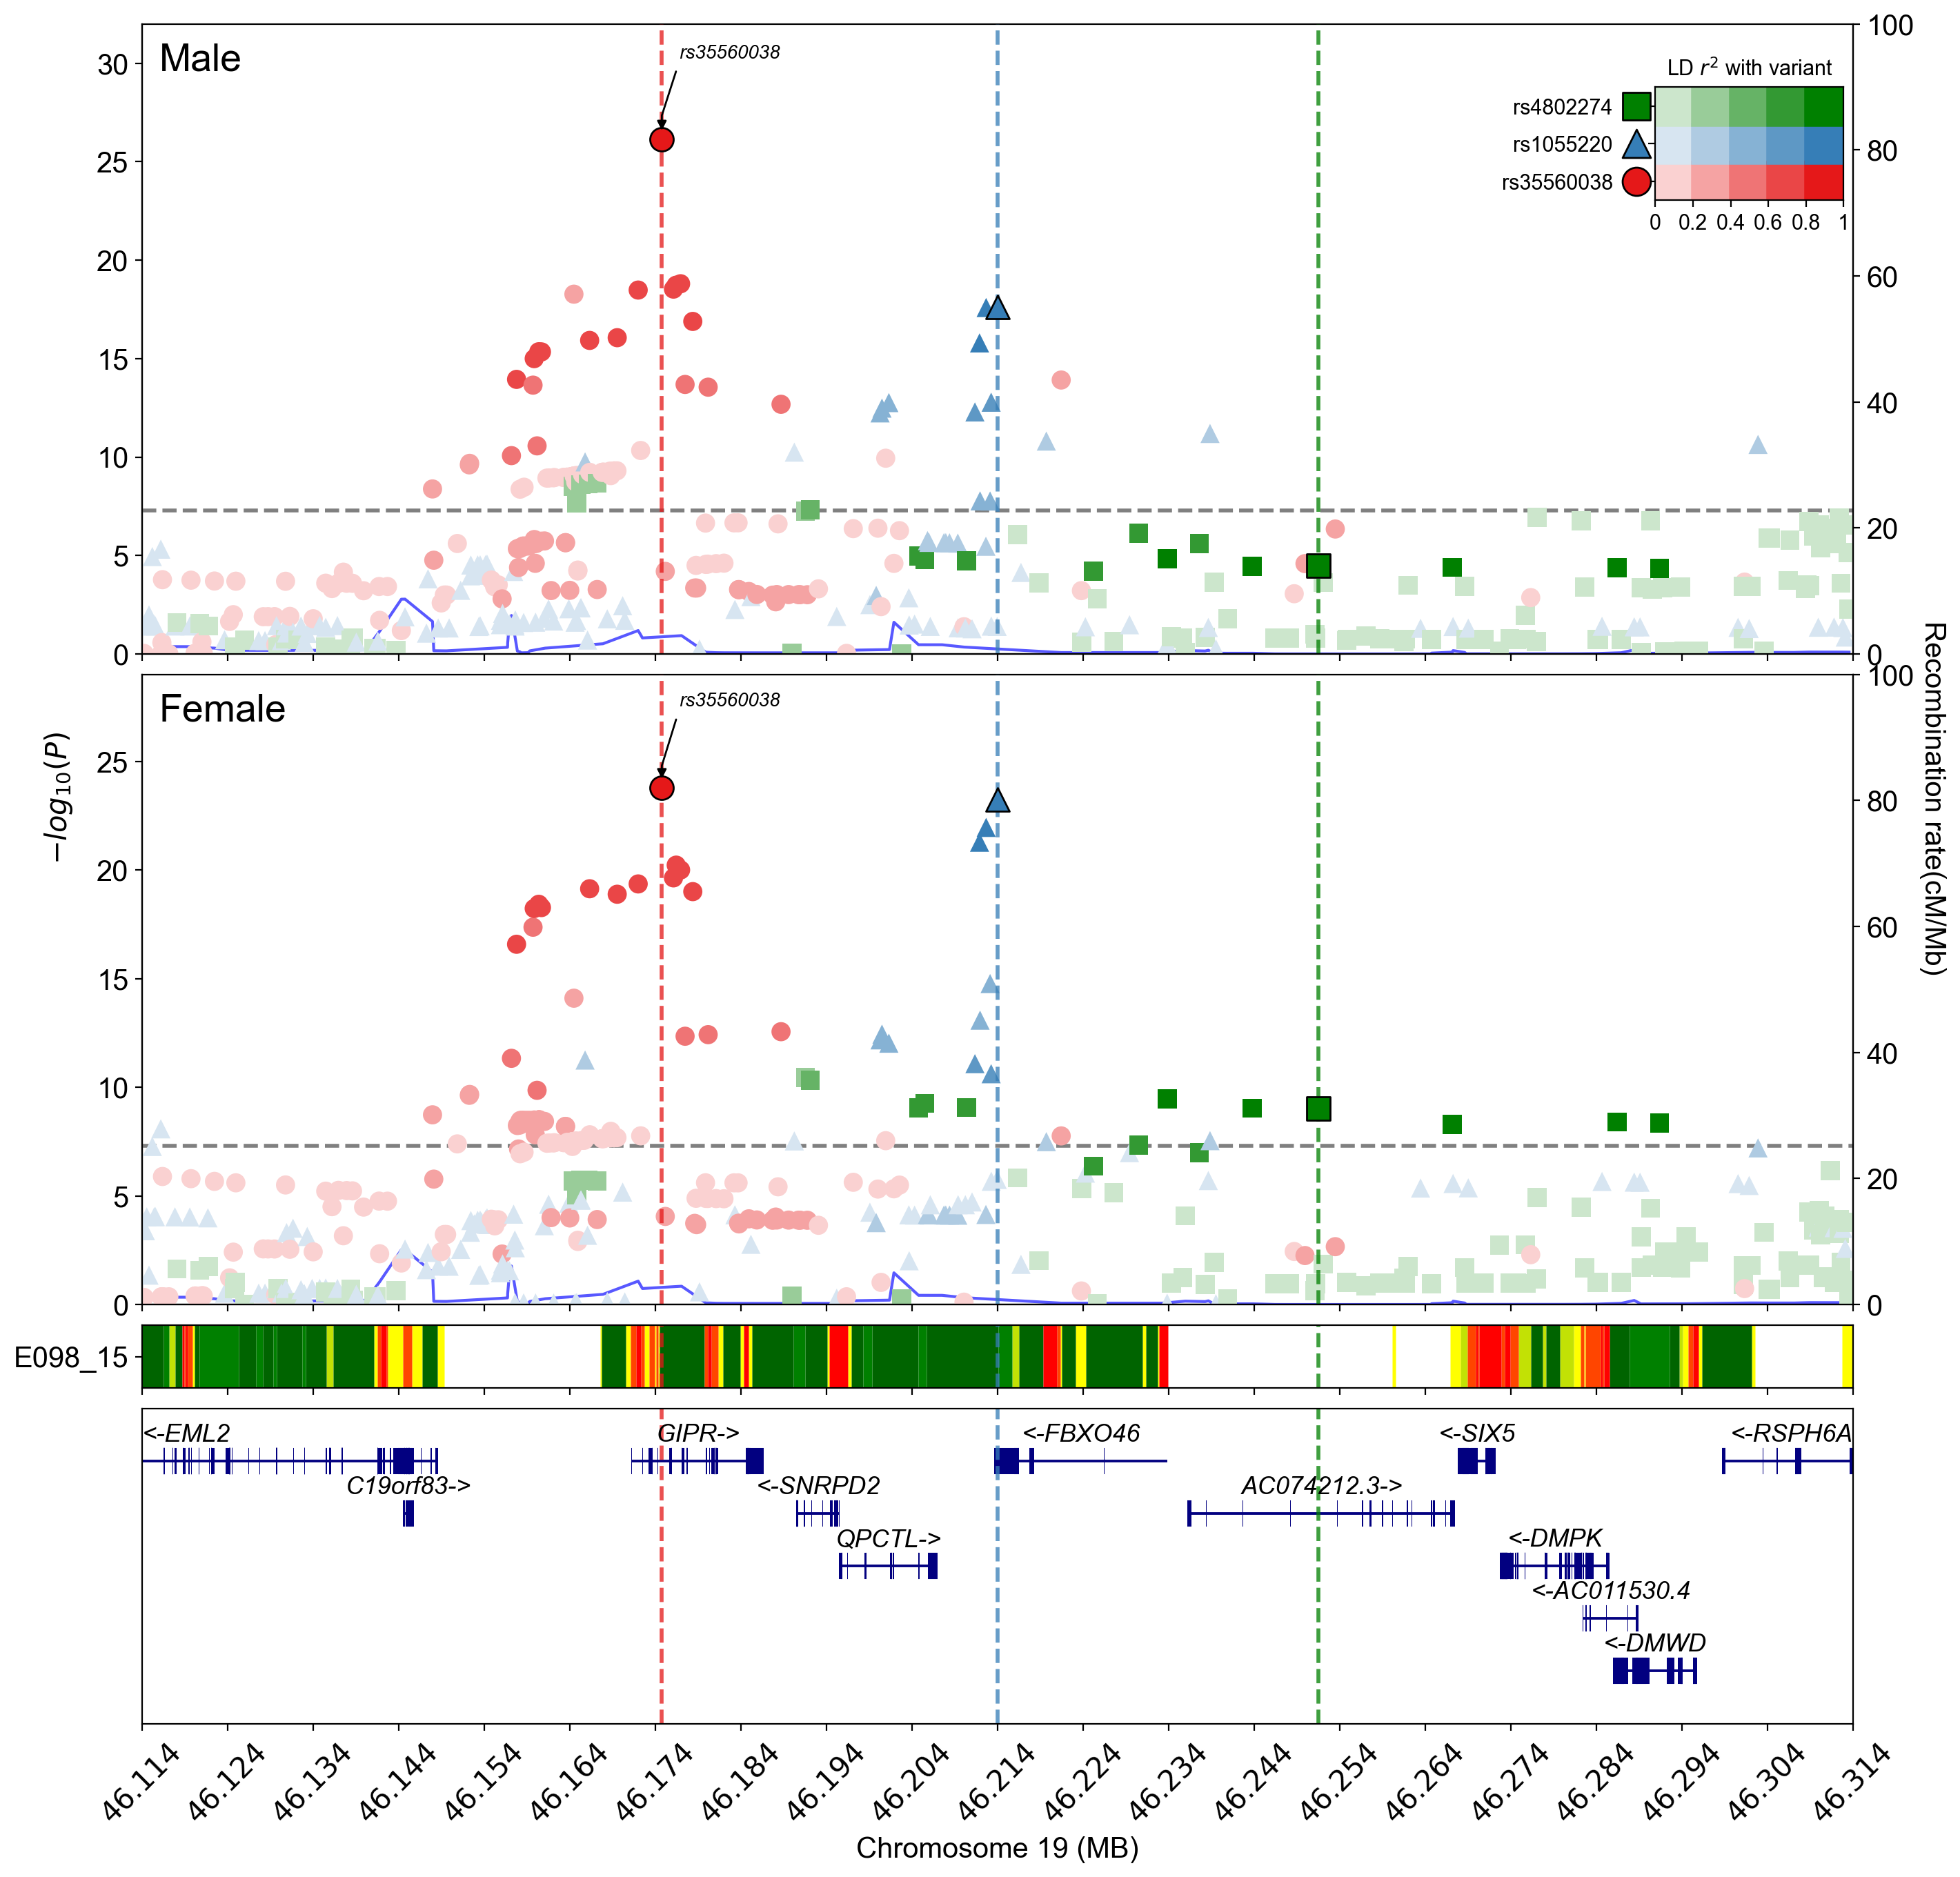

In [16]:
gl.plot_stacked_mqq(objects=[gl1,gl2],
                    vcfs=[gl.get_path("1kg_eas_hg19"), gl.get_path("1kg_eas_hg19")],
                    region=(19,46214297 - 100000, 46214297 + 100000),
                    region_ref =["rs35560038","rs1055220","rs4802274"],
                    build="19",
                    anno="SNPID",
                    fontsize=15,
                    mode="r",
                    region_chromatin_files=["../0_sample_data/E098_15_coreMarks_mnemonics.bed.gz"],
                    region_chromatin_labels=["E098_15"],
                    cbar_fontsize=11,
                    anno_xshift=0.01,
                    marker_size=(100,100),
                    titles=["Male","Female"],
                    title_args={"size":20},
                    anno_args={"rotation":0,"fontsize":10}, 
                    verbose=False, check=False)

### turn off legend marker

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


(<Figure size 3200x3200 with 7 Axes>, <gwaslab.g_Log.Log at 0x7fd953018c70>)

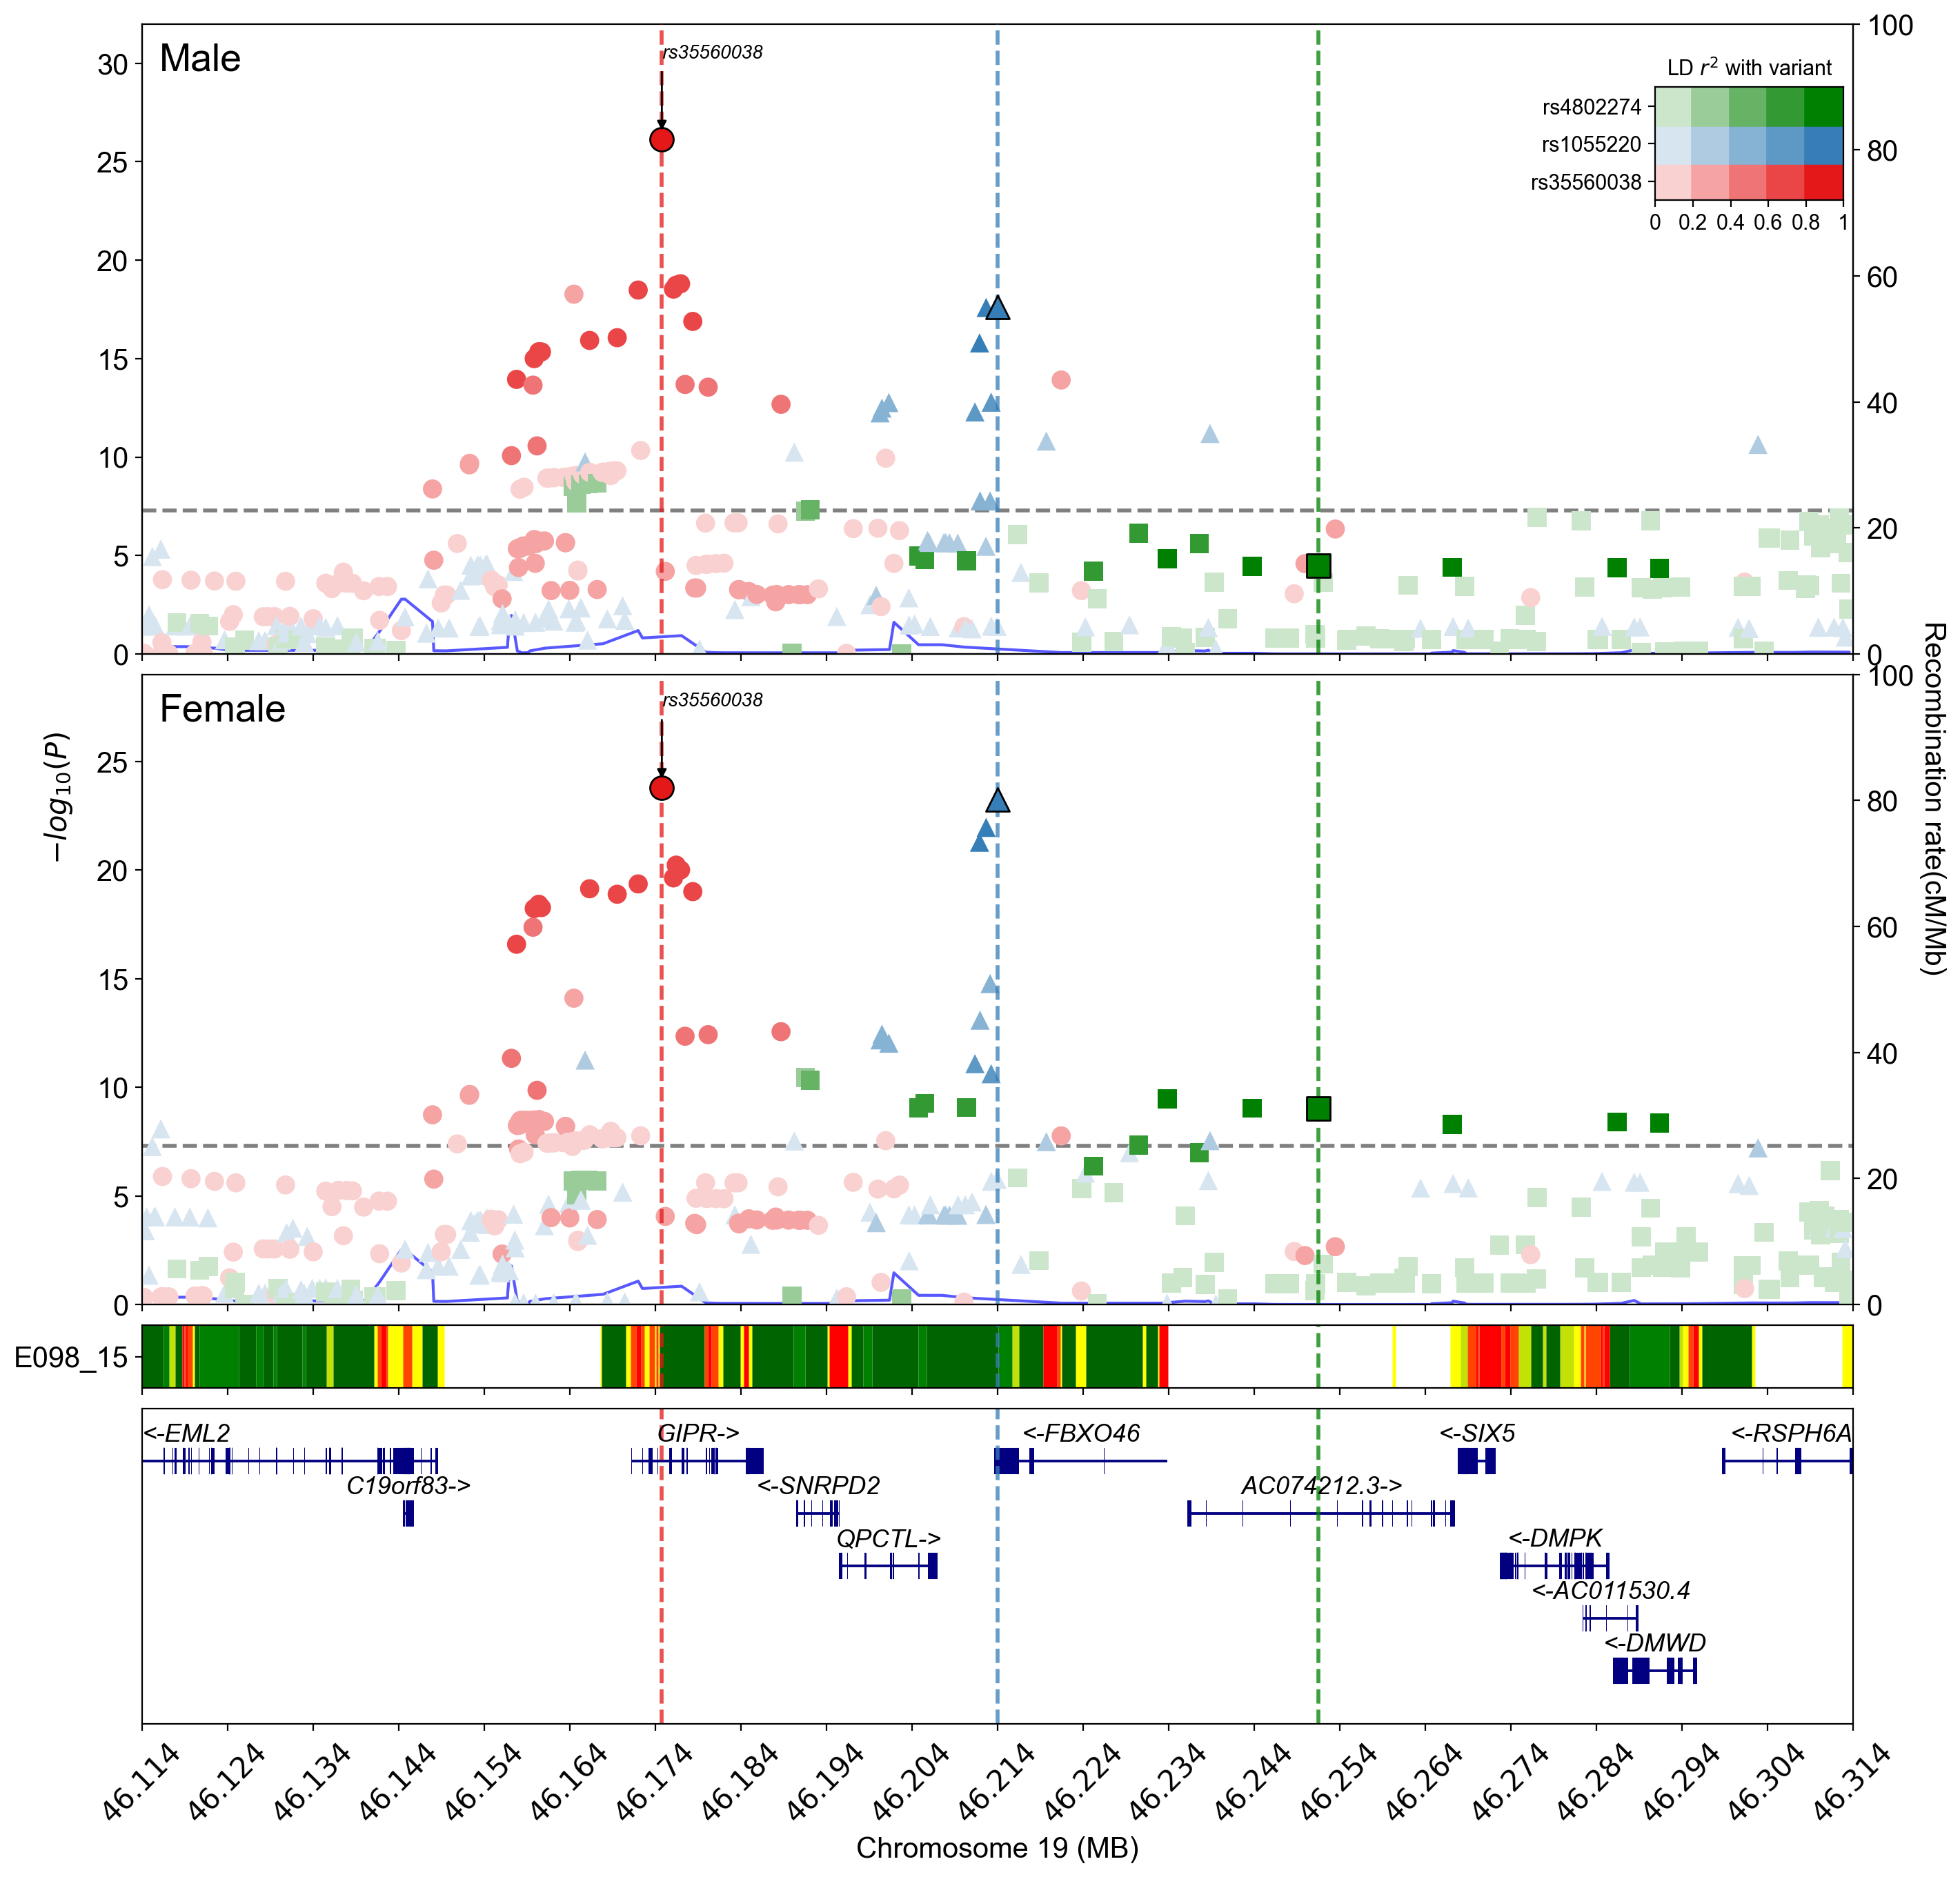

In [17]:
gl.plot_stacked_mqq(objects=[gl1,gl2],
                    vcfs=[gl.get_path("1kg_eas_hg19"), gl.get_path("1kg_eas_hg19")],
                    region_legend_marker=False,
                    region=(19,46214297 - 100000, 46214297 + 100000),
                    region_ref =["rs35560038","rs1055220","rs4802274"],
                    build="19",
                    anno="SNPID",
                    fontsize=15,
                    mode="r",
                    region_chromatin_files=["../0_sample_data/E098_15_coreMarks_mnemonics.bed.gz"],
                    region_chromatin_labels=["E098_15"],
                    cbar_fontsize=11,
                    marker_size=(100,100),
                    titles=["Male","Female"],
                    title_args={"size":20},
                    anno_args={"rotation":0,"fontsize":10}, 
                    verbose=False, check=False)